# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

No handles with labels found to put in legend.


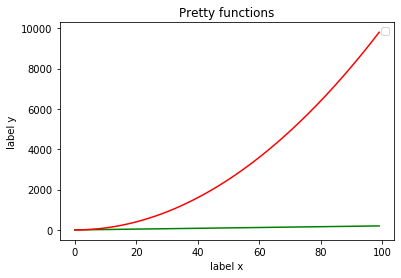

In [3]:
# Method 1: all in one

plt.plot(x,y, 'g')
plt.plot(x,z, 'r')
plt.xlabel('label x')
plt.ylabel('label y')
plt.title("Pretty functions")
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

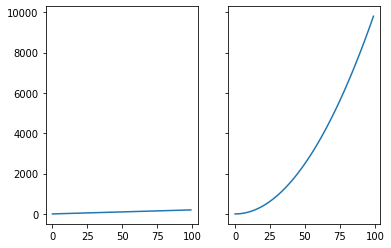

In [4]:
# Method 2

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.plot(x, z)

plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

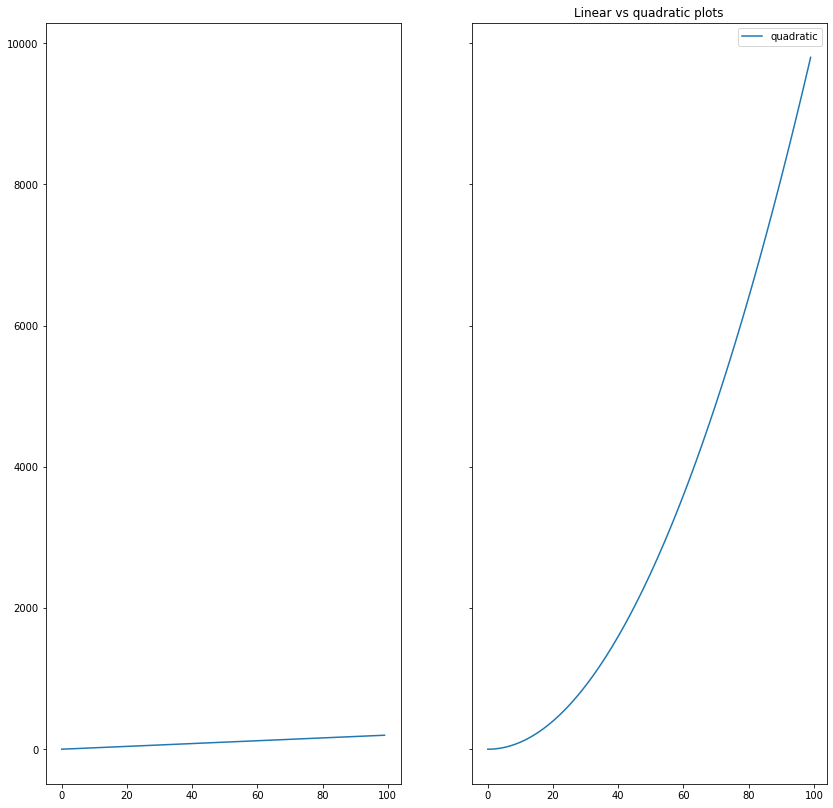

In [5]:
## your code here
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,14))
ax1.plot(x, y, label = 'linear')
ax2.plot(x, z, label = 'quadratic')


plt.title("Linear vs quadratic plots")
plt.legend()
plt.show()



#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

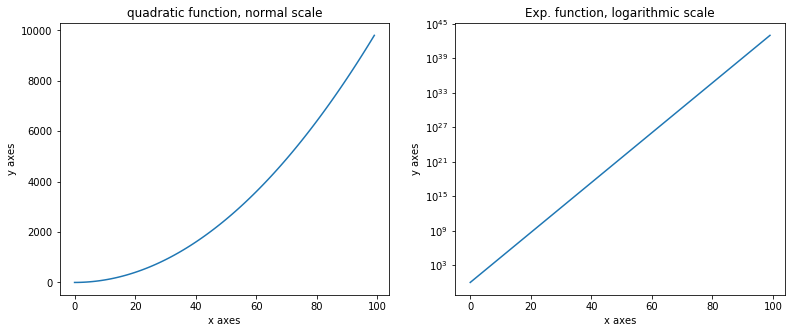

In [6]:
# your code here
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(13, 5))

ax1.plot(x,x**2);
ax1.set_title('quadratic function, normal scale')
ax1.set_xlabel('x axes');
ax1.set_ylabel('y axes');

ax2.plot(x,np.exp(x));
ax2.set_title('Exp. function, logarithmic scale') 
ax2.set_xlabel('x axes');
ax2.set_ylabel('y axes');
ax2.set_yscale('log');

#### As a bonus challenge, try to add a legend to the plot.

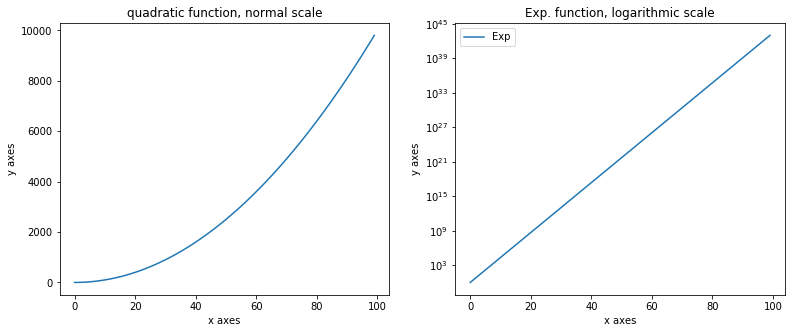

In [7]:
# your code here
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(13, 5))

ax1.plot(x,x**2,label = 'x-squared');
ax1.set_title('quadratic function, normal scale')
ax1.set_xlabel('x axes');
ax1.set_ylabel('y axes');

ax2.plot(x, np.exp(x), label = 'Exp' );
ax2.set_title('Exp. function, logarithmic scale') 
ax2.set_xlabel('x axes');
ax2.set_ylabel('y axes');
ax2.set_yscale('log');

plt.legend()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('Fitbit2.csv', low_memory=False)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [9]:
fitbit['Months_encoded']

0      5
1      5
2      5
3      5
4      5
      ..
362    5
363    5
364    5
365    5
366    5
Name: Months_encoded, Length: 367, dtype: int64

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

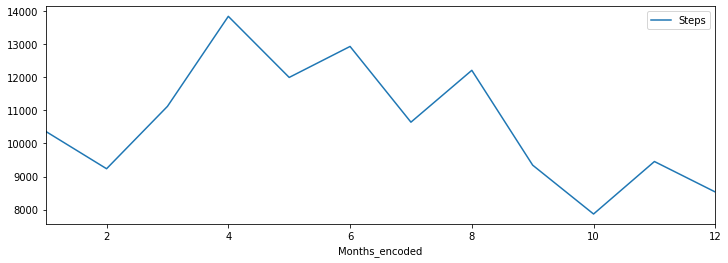

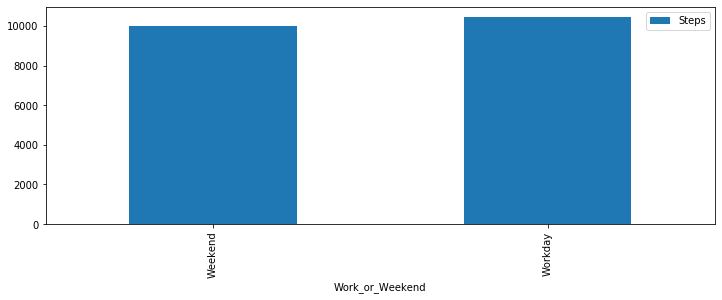

In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
monthly_steps = fitbit.groupby(by = ['Months_encoded']).agg({'Steps':np.median})

# MEDIAN STEPS BY WORK_OR_WEEKEND
weekly_steps = fitbit.groupby(by = ['Work_or_Weekend']).agg({'Steps':np.median})


#Explore plt.sca - Set the current Axes instance to ax.
#Explore plt.xticks - Get or set the current tick locations and labels of the x-axis.

plot_month = monthly_steps.plot(figsize=(12,4))
#plt.sca(plot_month[0]) - not sure how to inegrate this
plt.savefig('steps_year_evolution')


#1=weekday, 0=weekend

x_labels = ['Weekend', 'Workday']

plot_week = weekly_steps.plot.bar(xticks = weekly_steps.index, figsize=(12,4))

plot_week.set_xticklabels(x_labels)

plt.savefig('steps_week')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

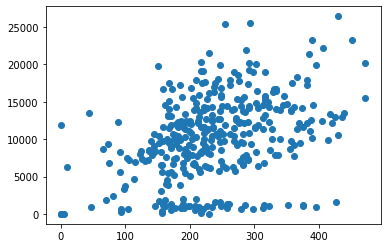

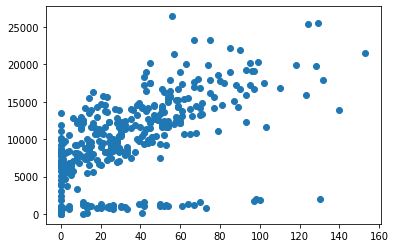

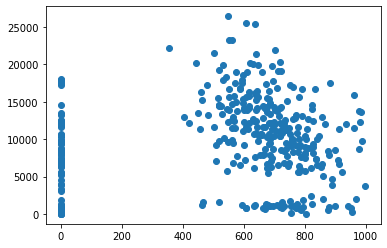

In [14]:
mla = fitbit['Minutes Lightly Active']
stp = fitbit['Steps']
mva = fitbit['Minutes Very Active']
ms = fitbit['Minutes Sedentary']

#nrows=1, ncols=3
x = [mla, mva, ms]
y = [stp, stp, stp]

#other method:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,6))
#sharey - Controls sharing of properties among x (sharex) or y (sharey) axes:
# True or 'all': x- or y-axis will be shared among all subplots.

for i in range(len(x)):
    plt.figure()
    plt.scatter(x[i], y[i])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [15]:
titanic = pd.read_csv('titanic.csv', low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
numerical=titanic.select_dtypes(include=['float64', 'int64'])
numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [22]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

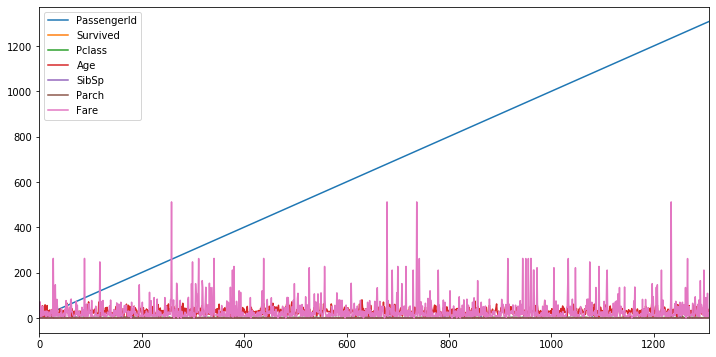

In [23]:
numerical.plot(figsize=(12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

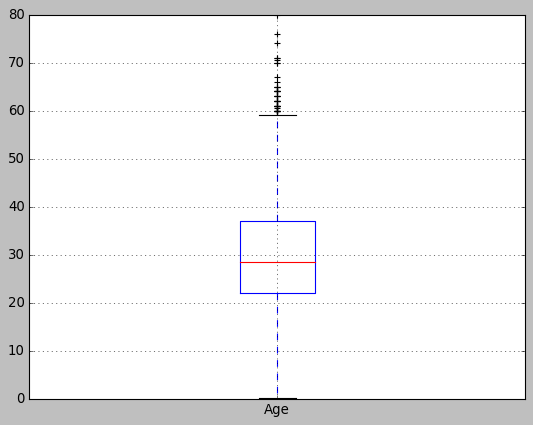

In [24]:
#I think the visualization that makes more sense would be a boxplot
titanic.boxplot(column="Age");

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1803c490>],
      dtype=object)

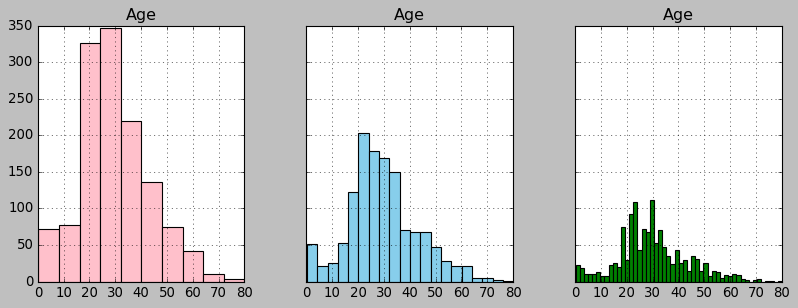

In [25]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))

titanic.hist(column='Age', ax=ax[0], bins=10,color = "pink")
titanic.hist(column='Age', ax=ax[1], bins=20, color = "skyblue")
titanic.hist(column='Age', ax=ax[2], bins=50, color = "green")

#### How does the bin size affect your plot?

In [26]:
"""
The bin number defines the number of equal-width bins in the range. 
That is, divide the entire range of values into a series of intervals.
If we increase the number of bars is natural that we start seeing a smaller graph.
A higher number of bins should increase the graph's accuracy but it's visually less appealing.  
"""

"\nThe bin number defines the number of equal-width bins in the range. \nThat is, divide the entire range of values into a series of intervals.\nIf we increase the number of bars is natural that we start seeing a smaller graph.\nA higher number of bins should increase the graph's accuracy but it's visually less appealing.  \n"

#### Use seaborn to show the distribution of column `Age`.

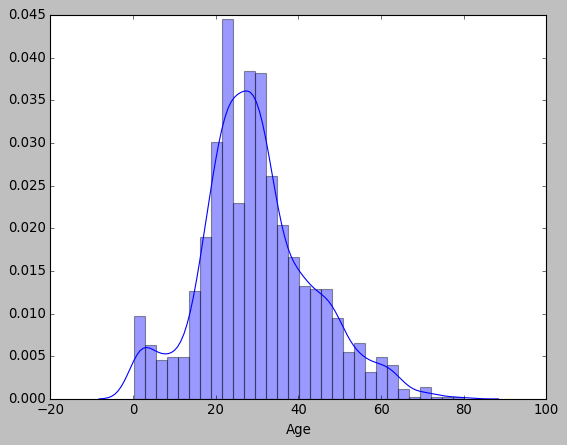

In [27]:
# your code here
sns.distplot(titanic['Age'], color='blue');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

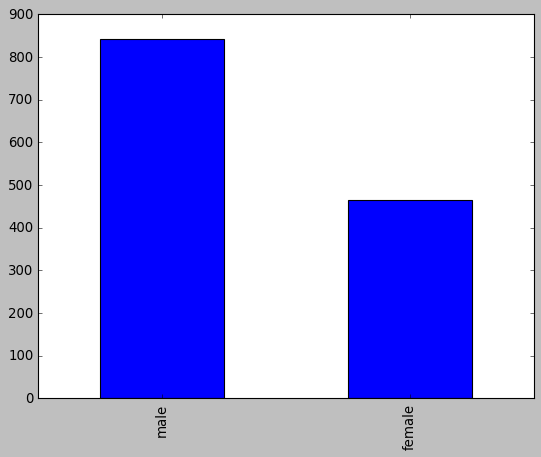

In [28]:
# Method 1 - matplotlib
# your code here

titanic['Gender'].value_counts().plot.bar();


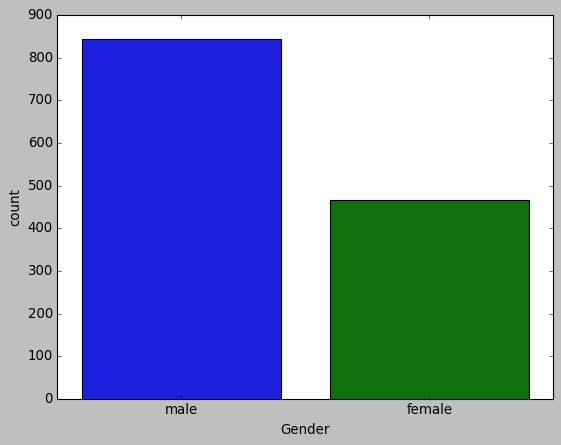

In [29]:
# Method 2 - seaborn
# your code here

sns.countplot(x="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

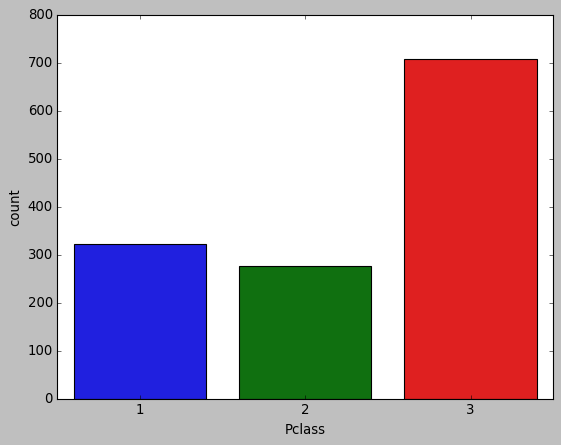

In [30]:
# your code here
sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

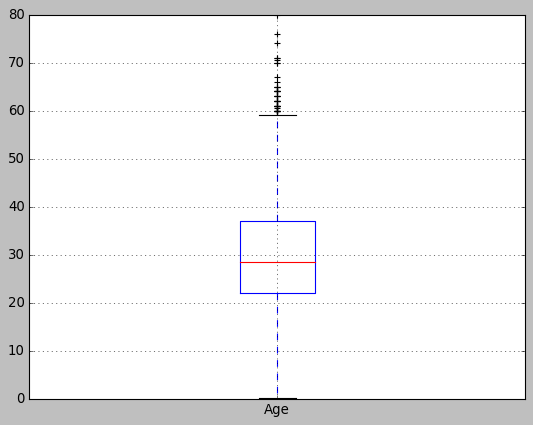

In [31]:
# your code here

titanic.boxplot(column="Age");

In [32]:
"""
As I did already in previous exercise, boxplot is a very useful choice since it describes, in one plot, the variable 
distribution: represents the minimum, maximum, median, first quartile and third quartile in the data set.
"""

'\nAs I did already in previous exercise, boxplot is a very useful choice since it describes, in one plot, the variable \ndistribution: represents the minimum, maximum, median, first quartile and third quartile in the data set.\n'

#### What does the last plot tell you about the feature `Age`?

In [33]:
"""
The median is around 28/29 years old, 25% is around 22, 75% close to 37
Lower Limit is around 22 and Upper Limit 59
"""

'\nThe median is around 28/29 years old, 25% is around 22, 75% close to 37\nLower Limit is around 22 and Upper Limit 59\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

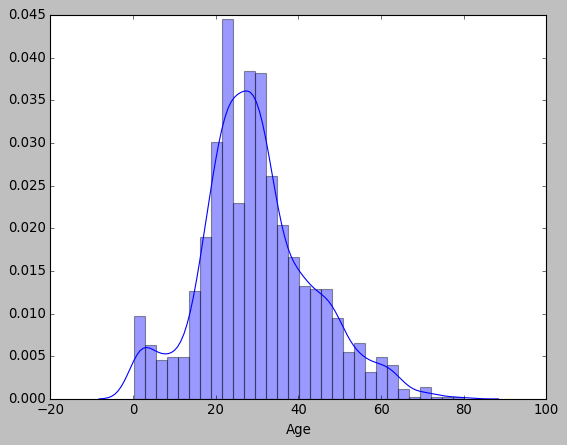

In [34]:
sns.distplot(titanic["Age"]);

#### What additional information does the last plot provide about feature `Age`?

In [35]:
"""
Additionally from the box plot comments we can see that the variable as a normal distribution 
"""

'\nAdditionally from the box plot comments we can see that the variable as a normal distribution \n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

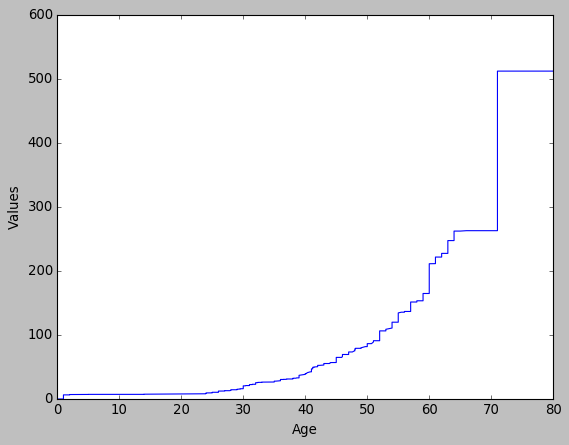

In [36]:
# Method 1 - matplotlib

age = titanic['Age'].sort_values()
fare = titanic['Fare'].sort_values()

plt.plot(age, fare)
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

#doesn't look very linear

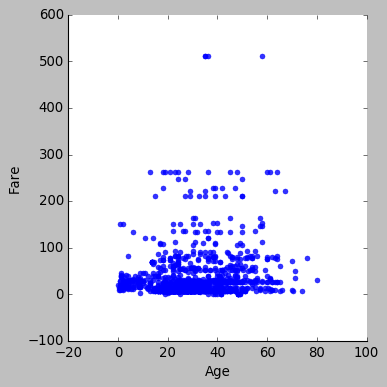

In [37]:
# Method 2 - seaborn

sns.lmplot(x="Age", y="Fare", data=titanic, fit_reg=False);

#same conclusion: not linear

#### Plot the correlation matrix using seaborn.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


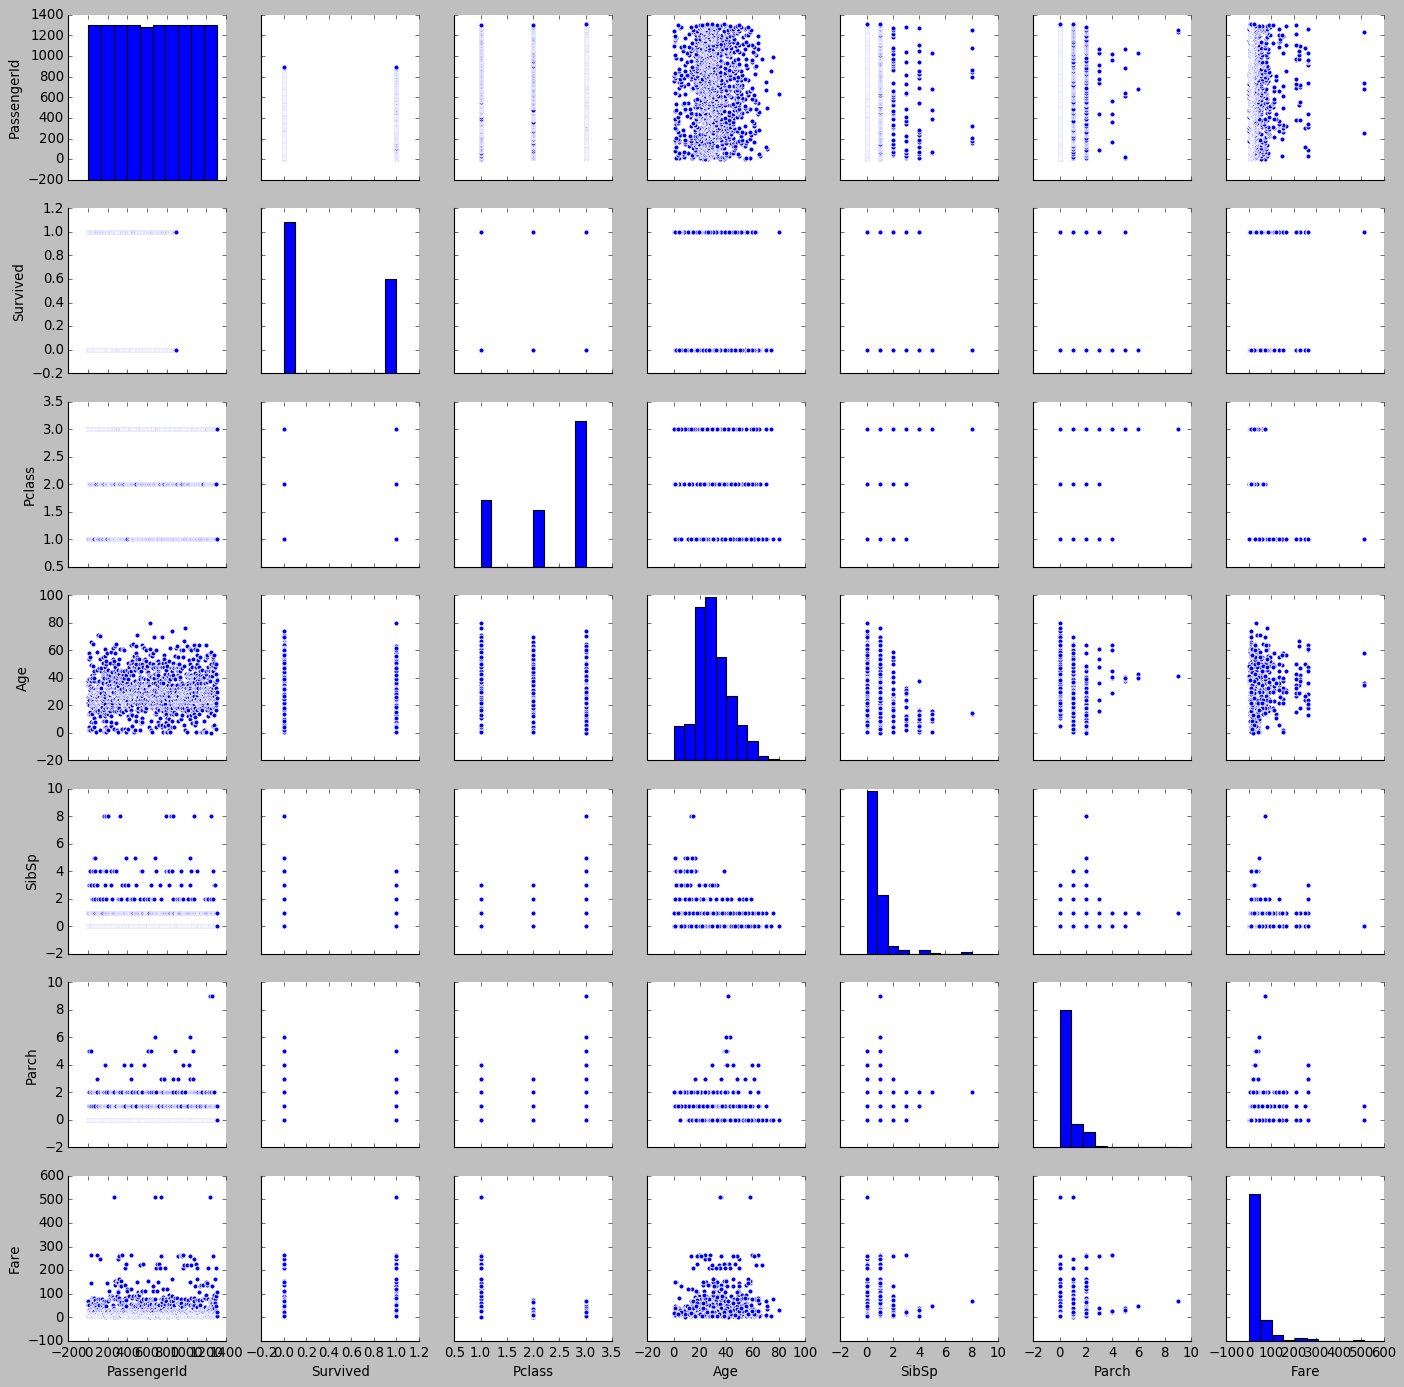

In [40]:
sns.pairplot(titanic)

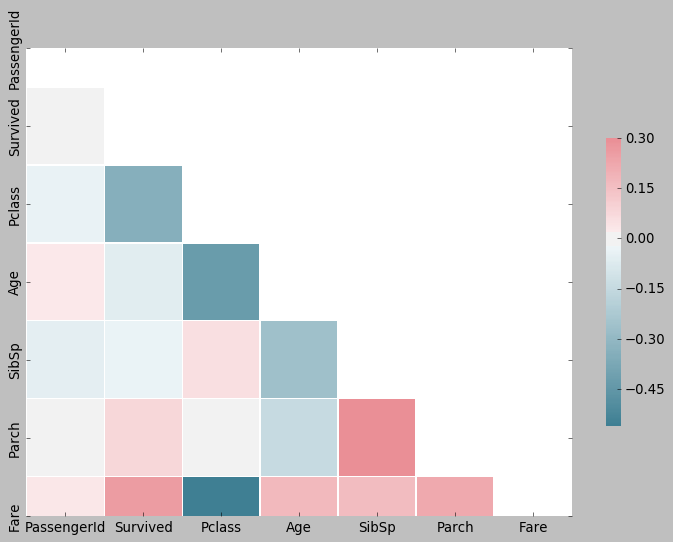

In [41]:
#other way - i like this one better

corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [42]:
"""
The most related features are:
- Peach and SibS (Number of Siblings/Spouses Aboard)
- Fare and Survived
- Fare and Parch (Number of Parents/Children Aboard)
"""

'\nThe most related features are:\n- Peach and SibS (Number of Siblings/Spouses Aboard)\n- Fare and Survived\n- Fare and Parch (Number of Parents/Children Aboard)\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

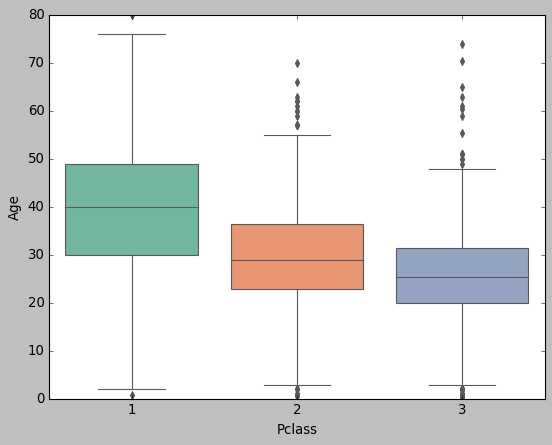

In [43]:
sns.boxplot(x="Pclass", y="Age",data=titanic, palette="Set2");


#we can see that passangers in first class are older and have a more broad age range

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

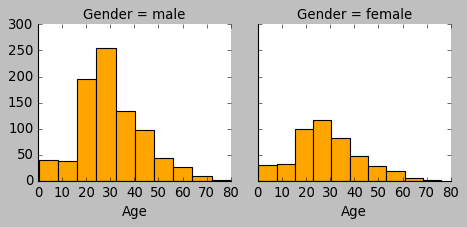

In [44]:
age_gender = sns.FacetGrid(titanic, col="Gender")
age_gender.map(plt.hist, "Age", color = 'orange');